In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
housing=pd.read_csv('Housing.csv', skipinitialspace= True)

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
len(housing.index)

545

In [5]:
df=housing.loc[:,['area','price']]

In [6]:
df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [7]:
df_columns=df.columns

In [8]:
scaler=MinMaxScaler()
df=scaler.fit_transform(df)

In [9]:
df=pd.DataFrame(df)
df.columns=df_columns
df.head()

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364


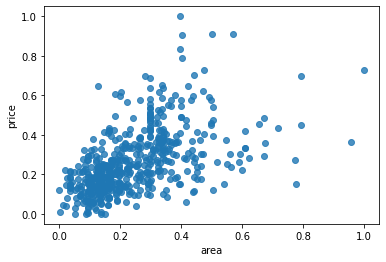

In [10]:
sns.regplot(x='area',y='price', data=df, fit_reg=False)

In [11]:
df_train, df_test=train_test_split(df, train_size=0.7, test_size=0.3, random_state=10)

print(len(df_train))
print(len(df_test))

381
164


In [12]:
x_train=df_train['area']
x_train=x_train.values.reshape(-1,1)
y_train=df_train['price']

x_test=df_test['area']
x_test=x_test.values.reshape(-1,1)
y_test=df_test['price']

In [13]:
len(x_train)

381

In [14]:
degrees= [1,2,3,6,10,20]

In [15]:
y_train_pred=np.zeros((len(x_train), len(degrees)))

In [16]:
y_test_pred=np.zeros((len(x_test),len(degrees)))

In [17]:
for i, degree in enumerate(degrees):
    model=make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train,y_train)
    
    y_train_pred[:,i]=model.predict(x_train)
    y_test_pred[:,i]=model.predict(x_test)

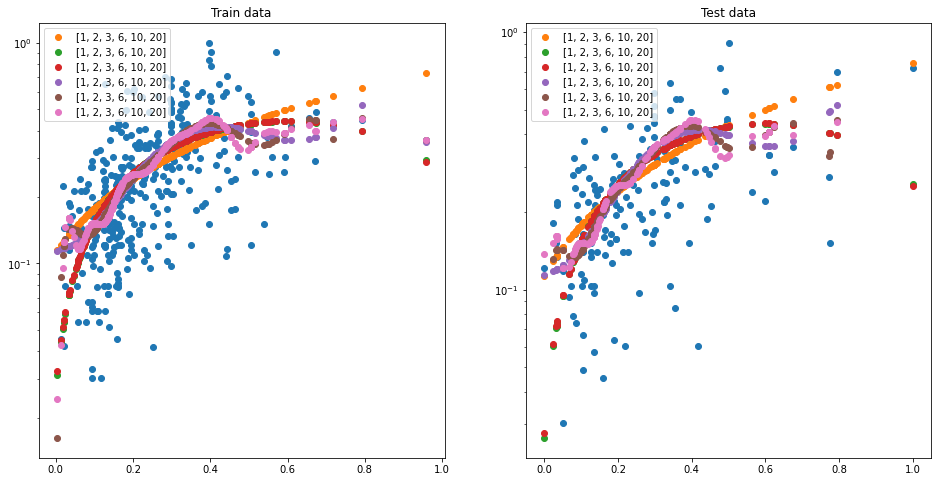

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.scatter(x_train, y_train)
plt.yscale('log')
plt.title('Train data')
for i, degree in enumerate(degrees):
    plt.scatter(x_train, y_train_pred[:,i],label=str(degrees))
    plt.legend(loc='upper left')
    
plt.subplot(122)
plt.scatter(x_test,y_test)
plt.yscale('log')
plt.title('Test data')
for i, degree in enumerate(degrees):
    plt.scatter(x_test, y_test_pred[:,i], label=str(degrees))
    plt.legend(loc='upper left')

In [19]:
print('r_score:')

for i, degree in enumerate(degrees):
    train_r2=round(sklearn.metrics.r2_score(y_train,y_train_pred[:,i]),2)
    test_r2=round(sklearn.metrics.r2_score(y_test,y_test_pred[:,i]),2)
    print('poly degree {0}: train score {1}: test score {2}:'.format(degree, train_r2, test_r2))

r_score:
poly degree 1: train score 0.29: test score 0.25:
poly degree 2: train score 0.34: test score 0.22:
poly degree 3: train score 0.34: test score 0.22:
poly degree 6: train score 0.36: test score 0.11:
poly degree 10: train score 0.37: test score -108.76:
poly degree 20: train score 0.38: test score -307071892461.64:


In [20]:
binary_vars_list=['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [21]:
def binary_map(x):
    return x.map({'yes':1, 'no':0})

housing[binary_vars_list]=housing[binary_vars_list].apply(binary_map)

In [22]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [23]:
status=pd.get_dummies(housing['furnishingstatus'], drop_first=True)

In [24]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [25]:
housing=pd.concat([housing, status], axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [26]:
housing.drop(['furnishingstatus'], axis=1, inplace=True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [27]:
df_train, df_test= train_test_split(housing, train_size=0.7, test_size=0.3, random_state=100)
scaler=MinMaxScaler()
numeric_vars=['area','bedrooms','bathrooms', 'stories', 'parking', 'price']
df_train[numeric_vars]=scaler.fit_transform(df_train[numeric_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [28]:
df_test[numeric_vars]=scaler.fit_transform(df_test[numeric_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.247651,0.084536,0.333333,0.000000,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.530201,0.298969,0.333333,0.333333,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.328859,0.592371,0.333333,0.000000,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.261745,0.252234,0.333333,0.000000,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.245638,0.226804,0.666667,0.000000,0.333333,1,0,0,0,1,0.000000,0,1,0


In [29]:
y_train=df_train.pop('price')
x_train=df_train

y_test=df_test.pop('price')
x_test=df_test

In [30]:
len(x_train.columns)

13

In [31]:
lm=LinearRegression()

In [32]:
lm.fit(x_train, y_train)

LinearRegression()

In [33]:
rfe=RFE(lm, n_features_to_select=10)
rfe=rfe.fit(x_train, y_train)

In [34]:
list(zip(x_train.columns, rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [35]:
y_pred=rfe.predict(x_test)

In [36]:
r2=sklearn.metrics.r2_score(y_test, y_pred)

In [37]:
print(r2)

0.5812051458999572


In [38]:
lm=LinearRegression()
lm.fit(x_train, y_train)

rfe=RFE(lm, n_features_to_select=6)
rfe=rfe.fit(x_train, y_train)

y_pred=rfe.predict(x_test)
r2= sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.535044502757882


In [39]:
lm=LinearRegression()

In [40]:
scores=cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
scores

array([0.6829775 , 0.69324306, 0.6762109 , 0.61782891, 0.59266171])

In [41]:
folds=KFold(n_splits=5, shuffle=True, random_state=100)
scores=cross_val_score(lm, x_train, y_train, scoring='r2', cv=folds)

In [42]:
scores

array([0.59930574, 0.71307628, 0.61325733, 0.62739077, 0.6212937 ])

In [43]:
scores=cross_val_score(lm, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.00806336, -0.00658776, -0.0064797 , -0.0070743 , -0.01523682])

In [44]:
len(x_train.columns)

13

In [45]:
folds=KFold(n_splits=5, shuffle=True, random_state=100)
hyper_params=[{'n_features_to_select': list(range(1,14))}]

lm=LinearRegression()
lm.fit(x_train, y_train)
rfe=RFE(lm)

model_cv=GridSearchCV(estimator=rfe, param_grid=hyper_params, scoring='r2', cv=folds, verbose=1, return_train_score=True)

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [46]:
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018951,4.370450e-03,0.003789,1.827513e-03,1,{'n_features_to_select': 1},0.172606,0.351721,0.206887,0.165910,...,0.243658,0.077627,13,0.302971,0.265961,0.280611,0.300768,0.269025,0.283867,0.015506
1,0.012566,2.718929e-03,0.002393,4.888116e-04,2,{'n_features_to_select': 2},0.335665,0.428751,0.439969,0.505321,...,0.438360,0.058374,12,0.505799,0.489802,0.462091,0.474178,0.471907,0.480755,0.015355
2,0.020342,8.801977e-03,0.002992,6.304510e-04,3,{'n_features_to_select': 3},0.421848,0.539257,0.491515,0.604426,...,0.516805,0.059902,11,0.568074,0.544917,0.542889,0.534685,0.542412,0.546596,0.011289
3,0.009175,3.992802e-04,0.001995,4.264961e-07,4,{'n_features_to_select': 4},0.449487,0.567101,0.494461,0.600237,...,0.526272,0.053074,10,0.587523,0.564018,0.549490,0.541496,0.549291,0.558364,0.016296
4,0.008776,3.993275e-04,0.001995,3.568323e-07,5,{'n_features_to_select': 5},0.494779,0.610200,0.492807,0.590812,...,0.541889,0.049257,8,0.620038,0.597033,0.584663,0.549413,0.589397,0.588109,0.022847
5,0.007978,1.525879e-06,0.001994,2.336015e-07,6,{'n_features_to_select': 6},0.512477,0.628849,0.488411,0.527379,...,0.541063,0.048029,9,0.626959,0.603122,0.596348,0.606852,0.601063,0.606869,0.010602
6,0.007380,4.887919e-04,0.002194,3.992084e-04,7,{'n_features_to_select': 7},0.568887,0.664093,0.552385,0.534634,...,0.577636,0.045006,7,0.658577,0.638501,0.630137,0.646285,0.638313,0.642363,0.009582
7,0.006981,1.784161e-07,0.001994,4.523674e-07,8,{'n_features_to_select': 8},0.570639,0.665608,0.592323,0.550001,...,0.591795,0.039428,6,0.674146,0.640825,0.654028,0.658665,0.657277,0.656988,0.010651
8,0.006184,3.988744e-04,0.001994,3.234067e-07,9,{'n_features_to_select': 9},0.578843,0.694189,0.606220,0.590777,...,0.615352,0.040767,4,0.676043,0.652605,0.659579,0.668996,0.664321,0.664309,0.007988
9,0.005586,4.885585e-04,0.001994,3.873843e-07,10,{'n_features_to_select': 10},0.574376,0.693197,0.601972,0.594335,...,0.608547,0.043498,5,0.686032,0.661729,0.674558,0.678443,0.677153,0.675583,0.007910


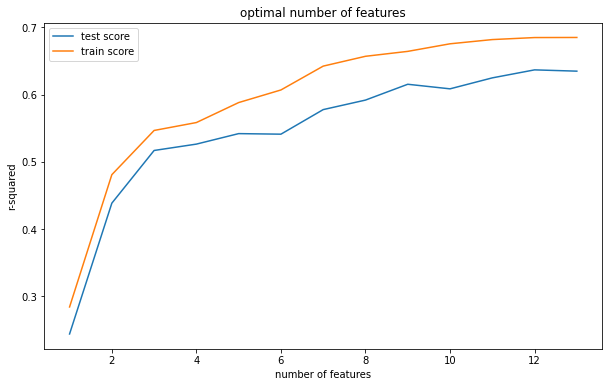

In [47]:
plt.figure(figsize=(10,6))

plt.plot(cv_result['param_n_features_to_select'], cv_result['mean_test_score'])
plt.plot(cv_result['param_n_features_to_select'], cv_result['mean_train_score'])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title('optimal number of features')
plt.legend(['test score','train score'], loc='upper left')

In [48]:
n_features_optimal=10

lm=LinearRegression()
lm.fit(x_train, y_train)

rfe=RFE(lm, n_features_to_select=n_features_optimal)
rfe=rfe.fit(x_train, y_train)

y_pred=lm.predict(x_test)
r2=sklearn.metrics.r2_score(y_test,y_pred)
print(r2)

0.5995575338728532


In [49]:
cars=pd.read_csv('CarPrice_Assignment.csv')

In [50]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [51]:
cars['symboling']=cars['symboling'].astype('object')

In [52]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [53]:
p=re.compile(r'\w+-?\w+')

In [54]:
cars['car_company']=cars['CarName'].apply(lambda x: re.findall(p,x)[0])

In [55]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [56]:
cars.loc[(cars['car_company']=='vw')|(cars['car_company']=='vokswagen'),'car_company']='volkswagen'

In [57]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [58]:
cars.loc[cars['car_company']=='porcshce', 'car_company']='porsche'
cars.loc[cars['car_company']=='toyouta', 'car_company']='toyota'
cars.loc[cars['car_company']=='Nissan', 'car_company']='nissan'
cars.loc[cars['car_company']=='maxda', 'car_company']='mazda'

In [59]:
cars=cars.drop('CarName',axis=1)

In [60]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [61]:
cars.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'car_company'],
      dtype='object')

In [62]:
x=cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]
y=cars['price']

In [63]:
cars_categorical=x.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [64]:
cars_dummies=pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
x=x.drop(list(cars_categorical.columns),axis=1)

In [66]:
x.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [67]:
x=pd.concat([x, cars_dummies],axis=1)

In [68]:
x.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


In [69]:
cols=x.columns
x=pd.DataFrame(scale(x))
x.columns=cols

In [70]:
x.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


In [71]:
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=40)

In [72]:
len(x_train.columns)

68

In [77]:
folds=KFold(n_splits=5, shuffle=True, random_state=100)
hyper_params=[{'n_features_to_select': list(range(2, 40))}]

In [78]:
lm=LinearRegression()
lm.fit(x_train, y_train)
rfe=RFE(lm)

In [79]:
model_cv=GridSearchCV(estimator=rfe, param_grid=hyper_params, scoring='r2', cv=folds, verbose=1, return_train_score=True)

In [80]:
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:   12.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [81]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.094946,1.962013e-02,0.003790,1.163931e-03,2,{'n_features_to_select': 2},0.712322,0.673284,0.839691,0.643727,...,0.716972,0.066867,35,0.693638,0.809346,0.768171,0.798515,0.798908,0.773715,0.042337
1,0.079787,1.515141e-02,0.002795,7.493798e-04,3,{'n_features_to_select': 3},0.817568,0.720574,0.864579,0.675851,...,0.704190,0.147102,38,0.796890,0.868796,0.833999,0.850420,0.845840,0.839189,0.023930
2,0.078789,1.042231e-02,0.002793,7.465315e-04,4,{'n_features_to_select': 4},0.829413,0.812420,0.862303,0.735701,...,0.736991,0.151742,33,0.834392,0.904158,0.894407,0.881821,0.850000,0.872956,0.026557
3,0.078590,6.128182e-03,0.002991,1.092101e-03,5,{'n_features_to_select': 5},0.669211,0.814914,0.864962,0.768708,...,0.710741,0.151825,37,0.863963,0.907896,0.897645,0.911010,0.895627,0.895228,0.016692
4,0.075598,1.136004e-02,0.002193,3.990654e-04,6,{'n_features_to_select': 6},0.675174,0.829293,0.873897,0.764830,...,0.716971,0.153020,36,0.864405,0.910425,0.901539,0.912918,0.909751,0.899808,0.018110
5,0.067619,6.224694e-03,0.002394,4.883441e-04,7,{'n_features_to_select': 7},0.619241,0.825256,0.854447,0.765352,...,0.722678,0.118774,34,0.875107,0.913424,0.909011,0.914559,0.926074,0.907635,0.017213
6,0.084972,1.065494e-02,0.003194,7.484733e-04,8,{'n_features_to_select': 8},0.608348,0.827366,0.848157,0.763983,...,0.768783,0.085134,31,0.887177,0.918335,0.924470,0.914797,0.930265,0.915009,0.014886
7,0.078590,1.109510e-02,0.002792,7.452362e-04,9,{'n_features_to_select': 9},0.638207,0.835079,0.848157,0.763969,...,0.773889,0.074660,29,0.889975,0.921886,0.924470,0.914826,0.934186,0.917069,0.014900
8,0.083776,7.803857e-03,0.002792,7.452337e-04,10,{'n_features_to_select': 10},0.637811,0.819335,0.854378,0.763966,...,0.776128,0.074982,27,0.889975,0.925014,0.931169,0.914828,0.939454,0.920088,0.017068
9,0.084573,1.868398e-02,0.003192,1.934033e-03,11,{'n_features_to_select': 11},0.637811,0.859000,0.860012,0.684470,...,0.770847,0.092361,30,0.889975,0.933753,0.936501,0.924168,0.940519,0.924983,0.018315


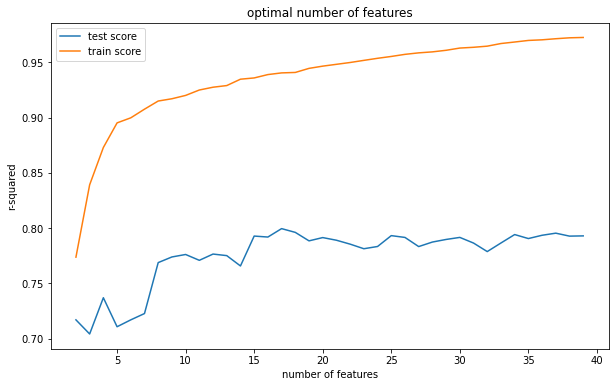

In [85]:
plt.figure(figsize=(10,6))
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_test_score'])
plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_train_score'])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title('optimal number of features')
plt.legend(['test score','train score'], loc='upper left')